# Analysis of Restaurant Data

*Jonathan Gonzalez*

## 1. Introduction

Even though my project is more focused on user experience, there are some findings that I found while going through different datasets. The notebook uses data from users who ran the `main.py`. The `sorted_restaurant.csv` will have, at the start, information about restaurants in Indianapolis (20 km radius). If you would like to see restaurants and a plan for a different location, run `main.py`. If you would like to create the plots showed below, run `visuals.py`.

## 2. Challenges
1. Location and Address Parsing
2. Error Handling
3. Data Sorting and Filtering
4. Data Visualization
5. Data Quality

## 3. Plan and Methodologies

### Plan
1. User Input
2. Google Maps API Integration
3. Data Manipulation and Sorting
4. Decide Restaurant Score
5. Output and Directions
6. Data Visualization

### Methodologies
- Modularization
- API Integration
- Error Handling
- Testing
- Documentation
- Version Control
- Data Visualization
- Performance Optimization

## 4. Loading data and setting global settings

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./sorted_restaurants.csv")
%matplotlib inline

### Loading data with Pandas

In [84]:
df = pd.read_csv("./sorted_restaurants.csv")
df.head()

,Unnamed: 0,ID,Name,Address,Latitude,Longitude,Types,Rating,User Ratings,Price Level,Maps Link,Website,Weighted Score
0,0,ChIJB32sqIVOa4gRpdggHAp2b_o,His Place Eatery,"6916 E 30th St, Indianapolis",39.811371,-86.046913,"['restaurant', 'food', 'point_of_interest', 'e...",4.5,3038,1,"https://www.google.com/maps?q=39.8113709,-86.0...",NaN,0.752568
1,1,ChIJ1R-MdPtca4gRJPsDPFeW1iE,Olive Garden Italian Restaurant,"1274 U.S. Hwy 31 N, Greenwood",39.633357,-86.126058,"['meal_takeaway', 'bar', 'restaurant', 'food',...",4.3,5203,2,"https://www.google.com/maps?q=39.633357,-86.12...",NaN,0.700000
2,2,ChIJcYtYFVSvbIgRq-HGYLWM_84,Olive Garden Italian Restaurant,"10243 E US Hwy 36, Avon",39.763198,-86.341444,"['meal_takeaway', 'bar', 'restaurant', 'food',...",4.4,4125,2,"https://www.google.com/maps?q=39.763198,-86.34...",NaN,0.651819
3,3,ChIJ_9SmJwlNa4gRAL9KoEOxF0w,Open Kitchen Restaurant,"4022 Shelby St, Indianapolis",39.707537,-86.139739,"['bar', 'restaurant', 'food', 'point_of_intere...",4.8,217,2,"https://www.google.com/maps?q=39.7075371,-86.1...",NaN,0.507134
4,4,ChIJHRZnrNRZa4gRKFa7wdJ6vXw,El Corcel Mexican Restaurant # 1,"3360 W Morris St, Indianapolis",39.750458,-86.215752,"['restaurant', 'food', 'point_of_interest', 'e...",4.5,588,1,"https://www.google.com/maps?q=39.7504578,-86.2...",NaN,0.461249


## 5. Description of the data

### Data types

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20 non-null     int64  
 1   ID              20 non-null     object 
 2   Name            20 non-null     object 
 3   Address         20 non-null     object 
 4   Latitude        20 non-null     float64
 5   Longitude       20 non-null     float64
 6   Types           20 non-null     object 
 7   Rating          20 non-null     float64
 8   User Ratings    20 non-null     int64  
 9   Price Level     20 non-null     int64  
 10  Maps Link       20 non-null     object 
 11  Website         0 non-null      float64
 12  Weighted Score  20 non-null     float64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ KB


In [86]:
df.describe()

,Unnamed: 0,Latitude,Longitude,Rating,User Ratings,Price Level,Website,Weighted Score
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,20.000000
mean,9.50000,39.744591,-86.159392,4.350000,1356.150000,1.500000,NaN,0.357586
std,5.91608,0.085227,0.113993,0.203909,1364.237604,0.606977,NaN,0.222925
min,0.00000,39.624823,-86.359268,3.800000,157.000000,0.000000,NaN,-0.273841
25%,4.75000,39.697269,-86.226361,4.275000,497.750000,1.000000,NaN,0.251810
50%,9.50000,39.739679,-86.125232,4.350000,844.000000,2.000000,NaN,0.367646
75%,14.25000,39.784962,-86.097209,4.500000,1601.250000,2.000000,NaN,0.456790
max,19.00000,39.913061,-85.957494,4.800000,5203.000000,2.000000,NaN,0.752568


## 6. Data Visualization

### Rating of Restaurants

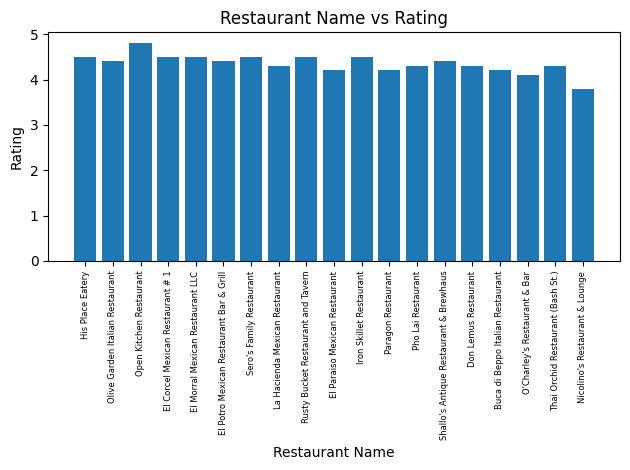

In [87]:
plt.bar(df["Name"], df["Rating"])
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")
plt.title("Restaurant Name vs Rating")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Number of Reviews per Restaurant

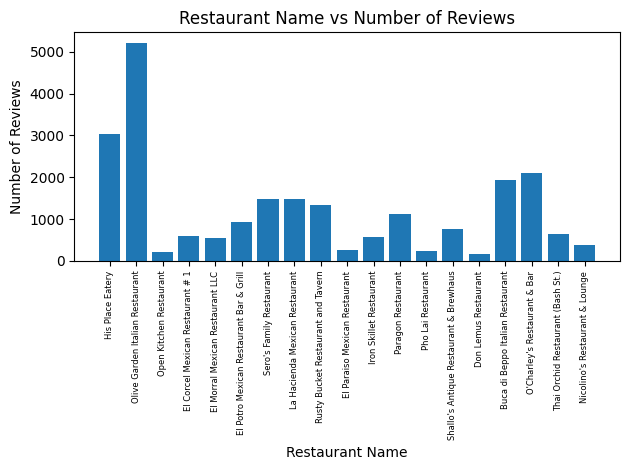

In [88]:
plt.bar(df["Name"], df["User Ratings"])
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Reviews")
plt.title("Restaurant Name vs Number of Reviews")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Price Level per Restaurant

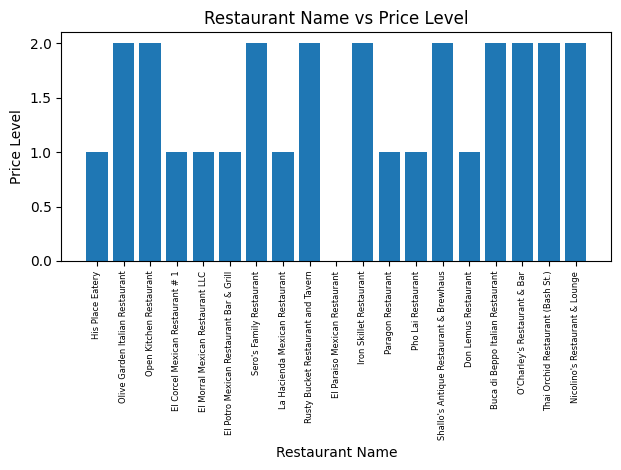

In [89]:
plt.bar(df["Name"], df["Price Level"])
plt.xlabel("Restaurant Name")
plt.ylabel("Price Level")
plt.title("Restaurant Name vs Price Level")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Rating and Number of Reviews per Restaurant

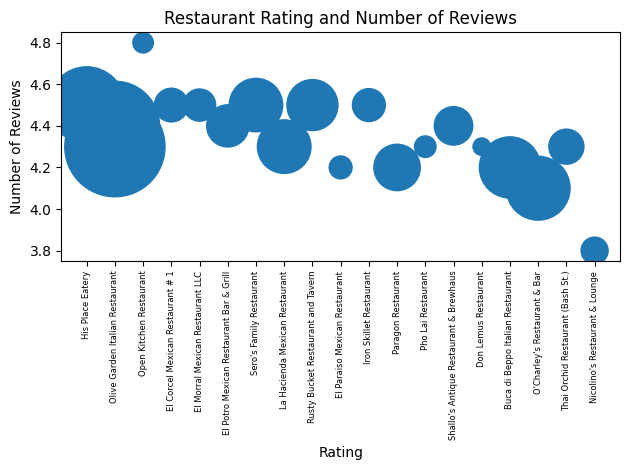

In [90]:
scale_factor = 1
plt.scatter(df["Name"], df["Rating"], s=df["User Ratings"] * scale_factor)
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Restaurant Rating and Number of Reviews")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Rating vs Number of Ratings

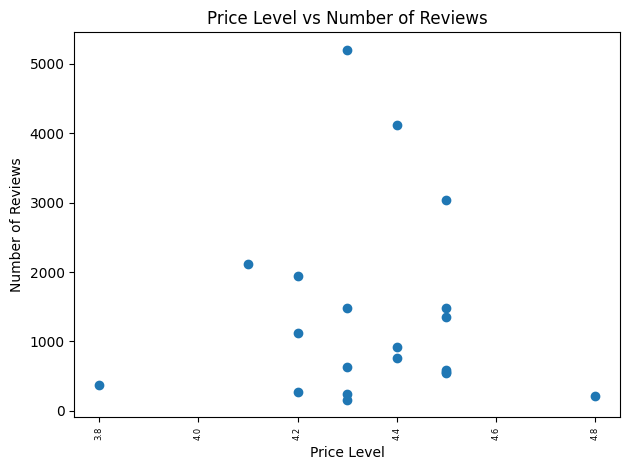

In [91]:
plt.scatter(df["Rating"], df["User Ratings"])
plt.xlabel("Price Level")
plt.ylabel("Number of Reviews")
plt.title("Price Level vs Number of Reviews")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Price vs Number of Ratings

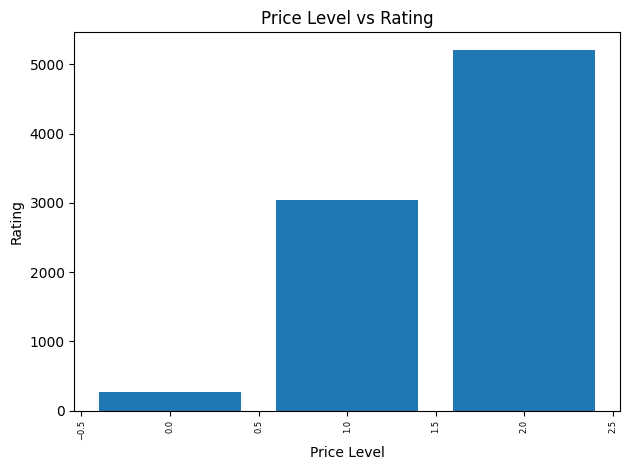

In [92]:
plt.bar(df["Price Level"], df["User Ratings"])
plt.xlabel("Price Level")
plt.ylabel("Rating")
plt.title("Price Level vs Rating")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Price vs Rating

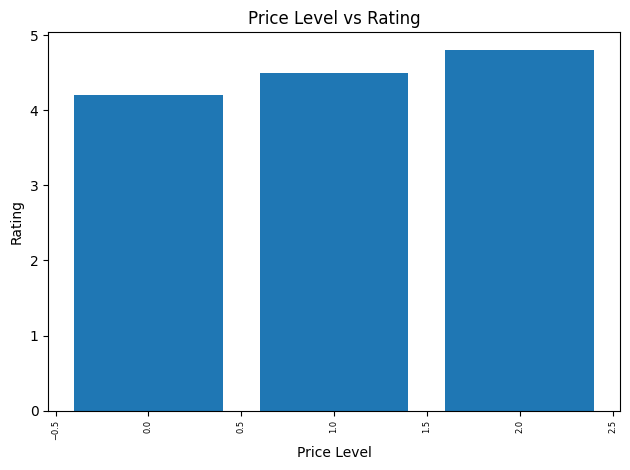

In [93]:
plt.bar(df["Price Level"], df["Rating"])
plt.xlabel("Price Level")
plt.ylabel("Rating")
plt.title("Price Level vs Rating")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.savefig("price_vs_rating.png", dpi=300)

### Weighted Score of 10 Restaurants

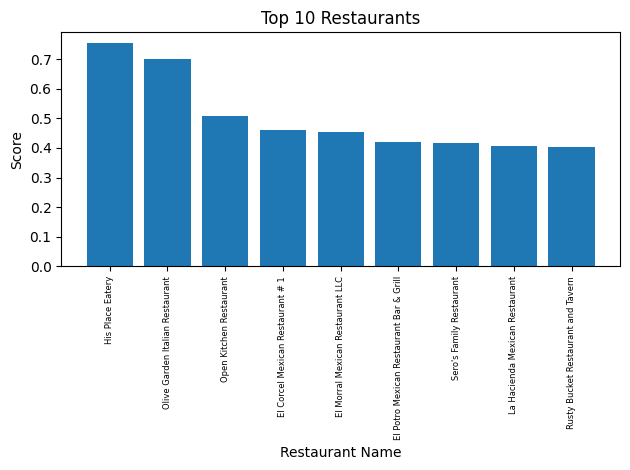

In [94]:
df_10 = df.head(10)
plt.bar(df_10["Name"], df_10["Weighted Score"])
plt.xlabel("Restaurant Name")
plt.ylabel("Score")
plt.title("Top 10 Restaurants")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

### Top 5 Best Rated Restaurant

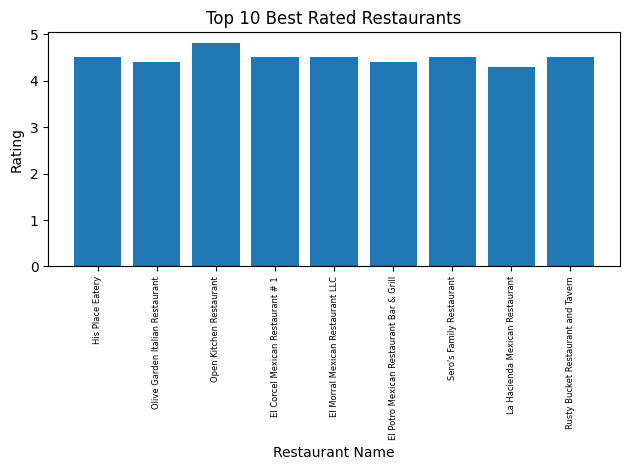

In [95]:
df = df.head(10)
plt.bar(df["Name"], df["Rating"])
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")
plt.title("Top 10 Best Rated Restaurants")
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.savefig("10_restaurants_rating.png", dpi=300)

## 7. Conclusion

**The Significance of Both Rating and Number of Ratings:**

My analysis revealed that while the overall rating of a restaurant is undoubtedly an essential factor in restaurant evaluation, the number of ratings it receives also plays a crucial role. Restaurants with a high number of ratings tend to be more reliable in their ratings, reflecting a more accurate assessment of their quality. This suggests that a higher number of ratings contributes to greater confidence in the restaurant's reputation.

**Weak Correlation Between Number of Reviews and Rating:**

Surprisingly, my analysis indicated a weak correlation between the number of reviews and a restaurant's rating. In other words, having more reviews doesn't necessarily guarantee a higher rating. This finding highlights the importance of considering other factors such as service, food quality, and ambience when evaluating a restaurant, rather than relying solely on the number of reviews.

**Price Levels Distribution:**

A significant portion of the analyzed restaurants falls within the price levels of 0 (free) to 2 (moderate). This suggests that most users prefer dining at restaurants with budget-friendly to moderately priced menu options. It could be an indicator of the price sensitivity of consumers or the availability of a variety of dining options within this price range.

**Clustering of Number of Reviews and Price Levels:**

I observed that the number of reviews is concentrated around price levels 1 and 2. This clustering might indicate that restaurants with moderate pricing tend to attract a larger customer base, leading to more reviews. However, it's essential to consider that higher-priced restaurants may receive fewer reviews but still maintain high-quality ratings.

## 8. What to do next?

Here are some things that I would like to add to the project:

- Choose better weights to get the best results.
- Use machine learning to decide what are the best weights for rating, number of ratings, and price level to get a more precise result.
- Look for more data provided by Google Maps API to improve the model.
- Make a user interface.
- With more data, I could create better graphs, with more details.